<a href="https://colab.research.google.com/github/JacinthaJanice/DAA/blob/main/Experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

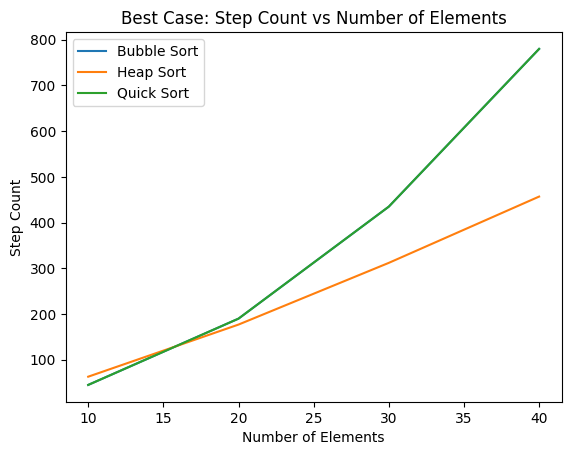

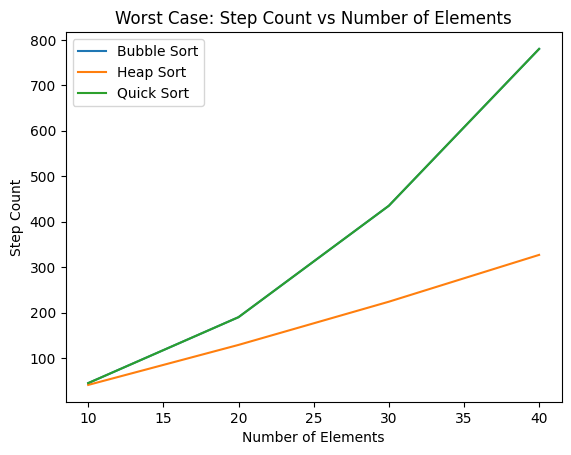

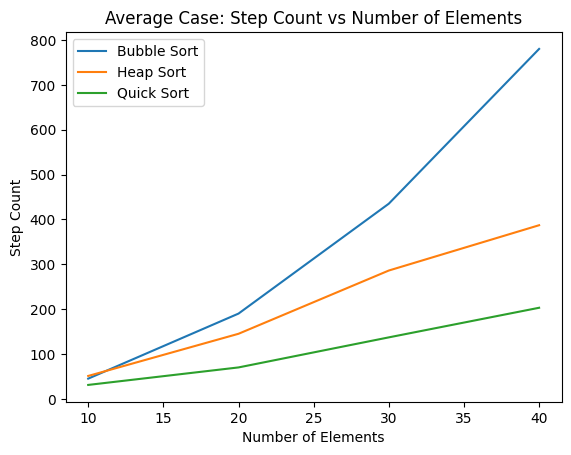

In [3]:
import random
import matplotlib.pyplot as plt

# Bubble Sort with step counting
def bubble_sort(arr):
    n = len(arr)
    steps = 0
    for i in range(n):
        for j in range(0, n-i-1):
            steps += 1  # Increment step count
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return steps

# Heap Sort with step counting
def heapify(arr, n, i, steps):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[l] > arr[largest]:
        largest = l
        steps += 1

    if r < n and arr[r] > arr[largest]:
        largest = r
        steps += 1

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        steps = heapify(arr, n, largest, steps)

    steps += 1
    return steps

def heap_sort(arr):
    n = len(arr)
    steps = 0

    for i in range(n // 2 - 1, -1, -1):
        steps = heapify(arr, n, i, steps)

    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        steps = heapify(arr, i, 0, steps)

    return steps

# Quick Sort with step counting
def partition(arr, low, high, steps):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        steps += 1
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return i + 1, steps

def quick_sort_recursive(arr, low, high, steps):
    if low < high:
        pi, steps = partition(arr, low, high, steps)
        steps = quick_sort_recursive(arr, low, pi-1, steps)
        steps = quick_sort_recursive(arr, pi+1, high, steps)
    return steps

def quick_sort(arr):
    return quick_sort_recursive(arr, 0, len(arr)-1, 0)

# Function to run the sorting algorithms and return step counts
def run_sorting_algorithms(array):
    bubble_steps = bubble_sort(array[:])
    heap_steps = heap_sort(array[:])
    quick_steps = quick_sort(array[:])

    return bubble_steps, heap_steps, quick_steps

# Function to generate best, worst, and average cases
def generate_cases(size):
    best_case = list(range(size))           # Already sorted (best for Bubble Sort)
    worst_case = list(range(size, 0, -1))   # Reversed (worst for Bubble Sort)
    average_case = random.sample(range(size), size)  # Random list (average case)

    return best_case, worst_case, average_case

# Plotting the results
def plot_results(iterations, bubble_steps, heap_steps, quick_steps, case_type):
    x = iterations

    plt.plot(x, bubble_steps, label='Bubble Sort')
    plt.plot(x, heap_steps, label='Heap Sort')
    plt.plot(x, quick_steps, label='Quick Sort')

    plt.xlabel('Number of Elements')
    plt.ylabel('Step Count')
    plt.title(f'{case_type} Case: Step Count vs Number of Elements')
    plt.legend()
    plt.show()

# Main function to run the experiments and plot the results
def main():
    sizes = [10, 20, 30, 40]
    cases = ["Best", "Worst", "Average"]

    for case in cases:
        bubble_steps_list = []
        heap_steps_list = []
        quick_steps_list = []

        for size in sizes:
            best_case, worst_case, average_case = generate_cases(size)
            if case == "Best":
                case_array = best_case
            elif case == "Worst":
                case_array = worst_case
            else:
                case_array = average_case

            bubble_steps, heap_steps, quick_steps = run_sorting_algorithms(case_array)

            bubble_steps_list.append(bubble_steps)
            heap_steps_list.append(heap_steps)
            quick_steps_list.append(quick_steps)

        plot_results(sizes, bubble_steps_list, heap_steps_list, quick_steps_list, case)

if __name__ == "__main__":
    main()

